In [17]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import yaml
import os
from networkx.algorithms import community
import community as community_louvain
import numpy as np
import time

print("Imports OK")


Imports OK


In [21]:
with open('../config.yaml', 'r') as f:
    config = yaml.safe_load(f)

print("Configuration chargée")
print(config['community']['louvain'])


Configuration chargée
{'resolution': 1.0, 'seed': 42}


In [22]:
with open(config['graph']['cache_path'], 'rb') as f:
    G = pickle.load(f)

print(f"Graphe chargé: {G.number_of_nodes()} nœuds, {G.number_of_edges()} arêtes")

# Si le graphe n'est pas connexe, utiliser la plus grande composante
if not nx.is_connected(G):
    print("Graphe non connexe, utilisation de la plus grande composante")
    largest_cc = max(nx.connected_components(G), key=len)
    G = G.subgraph(largest_cc).copy()
    print(f"Composante principale: {G.number_of_nodes()} nœuds, {G.number_of_edges()} arêtes")



Graphe chargé: 10363 nœuds, 300869 arêtes


In [23]:
print("\nLancement de Louvain...")
start = time.time()

partition = community_louvain.best_partition(
    G,
    weight="weight",
    resolution=1.0
)

elapsed = time.time() - start
print(f"Louvain terminé en {elapsed:.2f}s")



Lancement de Louvain...
Louvain terminé en 9.99s


In [24]:
communities_dict = {}
for node, com in partition.items():
    communities_dict.setdefault(com, set()).add(node)

communities_list = list(communities_dict.values())
modularity = community.modularity(G, communities_list, weight="weight")

print(f"Nombre de communautés : {len(communities_list)}")
print(f"Modularité : {modularity:.4f}")

sizes = sorted([len(c) for c in communities_list], reverse=True)
print(f"Plus grande communauté : {sizes[0]} auteurs")
print(f"Plus petite communauté : {sizes[-1]} auteurs")

Nombre de communautés : 45
Modularité : 0.7749
Plus grande communauté : 1000 auteurs
Plus petite communauté : 4 auteurs


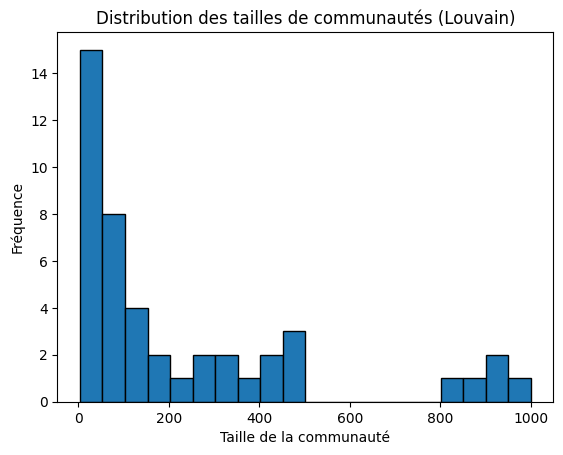

In [25]:
plt.hist(sizes, bins=20, edgecolor='black')
plt.title("Distribution des tailles de communautés (Louvain)")
plt.xlabel("Taille de la communauté")
plt.ylabel("Fréquence")

os.makedirs("../results/visualizations", exist_ok=True)
plt.savefig("../results/visualizations/louvain_sizes.png", dpi=300)
plt.show()

In [26]:
os.makedirs("../results/communities", exist_ok=True)

# 1) Partition → CSV
assignments = [
    {"authorId": node, 
     "name": G.nodes[node].get("name", ""), 
     "community": partition[node]}
    for node in G.nodes()
]

df = pd.DataFrame(assignments)
df.to_csv("../results/communities/louvain_assignments.csv", index=False)

# 2) Partition → pickle
with open("../results/communities/louvain_partition.pkl", "wb") as f:
    pickle.dump(partition, f)

# 3) Communautés
with open("../results/communities/louvain_communities.pkl", "wb") as f:
    pickle.dump(communities_list, f)

# 4) Stats
stats = {
    "communities": communities_list,   
    "partition": partition,           
    "algorithm": "Louvain",
    "modularity": float(modularity)
}

with open("../results/communities/louvain_stats.pkl", "wb") as f:
    pickle.dump(stats, f)

print("Sauvegardes terminées.")
print("louvain_assignments.csv")
print("louvain_partition.pkl")
print("louvain_communities.pkl")
print("louvain_stats.pkl")


Sauvegardes terminées.
louvain_assignments.csv
louvain_partition.pkl
louvain_communities.pkl
louvain_stats.pkl


In [28]:
import pickle

with open("../results/communities/louvain_stats.pkl", "rb") as f:
    obj = pickle.load(f)

obj


{'communities': [{'4204765',
   '83390207',
   '4160376',
   '49951877',
   '2106506628',
   '2148904543',
   '2118484750',
   '1752865048',
   '6010042',
   '118961885',
   '1992708068',
   '144076239',
   '2148919788',
   '24036969',
   '48387721',
   '1803218',
   '145657503',
   '123865558',
   '2051528118',
   '2116505227',
   '2443233',
   '143930563',
   '12459603',
   '145743766',
   '2115689465',
   '2115437382',
   '1558541225',
   '1890926506',
   '2175365',
   '143826491',
   '9714545',
   '143759604',
   '3685571',
   '8652308',
   '2257432695',
   '46700348',
   '2144330792',
   '66273798',
   '2150687325',
   '2145913600',
   '35869086',
   '49577833',
   '41018873',
   '50319359',
   '12322385',
   '2074541556',
   '118707418',
   '153191489',
   '1988888746',
   '2148900809',
   '1718192',
   '2108485135',
   '3393799',
   '145455267',
   '22253126',
   '80229279',
   '3469209',
   '2155385667',
   '2109534192',
   '2112677245',
   '68972407',
   '2118484076',
   '2148